In [1]:
import pandas as pd
import numpy as np
import chess_analyzer as chan

import seaborn as sns
import matplotlib.pyplot as plt

# best view options
pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)


In [2]:
max_eval = 500
current_user_name = 'Rosolimo'

date_start = '2025-01-01'
date_finish = '2025-12-01'

In [3]:
df = chan.get_analysys_results(date_start, date_finish, is_verbose=False)
work_df = chan.make_user_df(df)

/home/roman/python/kotelok/chess_evaluater/chess_analyzer.py:1748: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/home/roman/python/kotelok/chess_evaluater/chess_analyzer.py:1748: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/home/roman/python/kotelok/chess_evaluater/chess_analyzer.py:1748: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/home/roman/python/kotelok/chess_evaluater/chess_analyzer.py:1748: UserWarning: Could no

In [5]:
work_df.sample(3)

,game_id,game_end_time,color,player,opponent,result,opponent_result,points,opponent_points,rating,opponent_rating,rating_difference,time_control,time_class,rules,rated,url,game_phase,move_number,full_move,move_san,evaluation,evaluation_pawns,eval_change,move_type,time_remaining,opponent_time_remaining,time_used,opponent_time_used,is_same_material_kind,material,opponent_material,material_balance,is_capture,is_promotion,pawns,opponent_pawns,isolated_pawns,opponent_isolated_pawns,doubled_pawns,opponent_doubled_pawns,passed_pawns,opponent_passed_pawns,center_control,opponent_center_control,castled,opponent_castled,captures,opponent_captures,promotions,opponent_promotions,evaluation_pawns_relative,evaluation_pawns_group,evaluation_pawns_relative_group
138404,144788675490,2025-10-27 14:44:46,Black,LaGuigne69,Rosolimo,win,resigned,1.0,0.0,1740,1745,-5,NaT,NaT,chess,True,https://www.chess.com/game/live/144788675490,middlegame,34,17,Nd3,-569,-5.69,-6.77,blunder,174.8,154.2,39.2,59.8,True,24,24,0,False,False,5,5,0,1,0,0,1,1,3,3,True,False,5,5,0,0,5.69,6,6
91549,140237505380,2025-07-02 10:09:46,White,Rosolimo,Ruins226,resigned,win,0.0,1.0,1719,1795,-76,NaT,NaT,chess,True,https://www.chess.com/game/live/140237505380,opening,13,7,d5,48,0.48,-0.14,normal,182.9,178.0,11.1,14.0,True,39,39,0,False,False,8,8,0,0,0,0,0,0,5,3,False,False,0,0,0,0,0.48,0,0
11450,129491566057,2025-01-01 20:31:05,White,i_shookup_the_world,nikkei76,win,resigned,1.0,0.0,1716,1770,-54,180,NaT,chess,True,https://www.chess.com/game/live/129491566057,middlegame,63,32,Nxd7,1707,17.07,-4.25,blunder,117.7,56.4,62.3,123.6,False,28,14,14,True,False,5,5,0,2,0,0,0,0,5,3,False,False,9,5,0,0,17.07,17,17


In [20]:
df.sample(3)

,move_number,full_move,player,move_san,evaluation,evaluation_pawns,eval_change,move_type,game_phase,white_time_remaining,black_time_remaining,white_time_used,black_time_used,time_used,eco_code,white_material,black_material,material_balance,white_pawns,black_pawns,is_same_material_kind,white_isolated_pawns,black_isolated_pawns,white_doubled_pawns,black_doubled_pawns,white_passed_pawns,black_passed_pawns,white_center_control,black_center_control,white_castled,black_castled,white_captures,black_captures,white_promotions,black_promotions,is_capture,is_promotion,game_id,game_date,url,white_username,white_rating,white_result,white_points,black_username,black_rating,black_result,black_points,time_control,time_class,rules,end_time,end_timestamp,rated
98353,11,6,White,d4,-88,-0.88,-0.25,normal,opening,167.4,181.1,24.6,8.9,8.4,A03,39,39,0,8,8,True,0,0,0,0,0,0,6,5,False,False,0,0,0,0,False,False,140721976858,2025-07-15,https://www.chess.com/game/live/140721976858,maboalrayat,1707,checkmated,0.0,Rosolimo,1742,win,1.0,NaT,NaT,chess,2025-07-15 16:19:36,1752585576,True
8067,18,9,Black,b5,242,2.42,0.21,normal,opening,157.4,176.8,40.6,21.2,1.8,C00,38,37,1,7,6,False,0,1,0,0,0,0,5,3,False,False,2,1,0,0,False,False,129476654531,2025-01-01,https://www.chess.com/game/live/129476654531,King2Far,1808,checkmated,0.0,fineReuben,1817,win,1.0,NaT,NaT,chess,2025-01-01 16:32:29,1735738349,True
64894,51,26,White,Nxa5,3,0.03,0.10,normal,middlegame,117.5,147.2,114.5,82.8,6.2,D15,16,14,2,5,6,False,0,3,0,1,0,0,4,3,True,False,7,7,0,0,True,False,136863672024,2025-03-31,https://www.chess.com/game/live/136863672024,Rosolimo,1659,resigned,0.0,erhta,1675,win,1.0,NaT,NaT,chess,2025-03-31 10:08:36,1743404916,True


In [19]:
work_df['time_class'].value_counts()

Series([], Name: count, dtype: int64)

In [7]:
def get_resorses(work_df, fields):
    full_fields = fields.copy()
    full_fields.append('player')
    full_fields.append('evaluation_pawns_relative_group')

    res_df = work_df.groupby(full_fields).agg(
        games = ('game_id', 'nunique'),
        moves = ('move_number', 'count'),
        points = ('points', 'mean'),
    ).reset_index()

    return res_df[
                (res_df['evaluation_pawns_relative_group'] >= -4) &
                (res_df['evaluation_pawns_relative_group'] <= 4)
                ]

In [13]:
res_df = get_resorses(
                        work_df[work_df['player'] == current_user_name], 
                        ['color', 'game_phase']
                    )
print(len(res_df))

54


In [14]:
res_df

,color,game_phase,player,evaluation_pawns_relative_group,games,moves,points
52,Black,endgame,Rosolimo,-4,85,216,0.273148
53,Black,endgame,Rosolimo,-3,82,192,0.229167
54,Black,endgame,Rosolimo,-2,82,235,0.310638
55,Black,endgame,Rosolimo,-1,110,374,0.336898
56,Black,endgame,Rosolimo,0,170,1690,0.332544
57,Black,endgame,Rosolimo,1,98,307,0.638436
58,Black,endgame,Rosolimo,2,75,182,0.576923
59,Black,endgame,Rosolimo,3,66,160,0.706250
60,Black,endgame,Rosolimo,4,57,156,0.737179
123,Black,middlegame,Rosolimo,-4,201,433,0.339492


In [11]:
white_game_stat = work_df[work_df['color'] == 'White'].groupby([
    'game_id', 'color'
    ]).agg(
    moves_total = ('move_number', 'count'),
    eval_avg = ('evaluation_pawns', 'mean'),
    eval_change_total = ('eval_change', 'sum'),
    time_used_total = ('time_used', 'max'),
    material_balance_max = ('material_balance', 'max'),
    material_balance_min = ('material_balance', 'min'),
    normal_moves = ('move_type', lambda x: (x == 'normal').sum()),
    inaccuracy_moves = ('move_type', lambda x: (x == 'inaccuracy').sum()),
    blunder_moves = ('move_type', lambda x: (x == 'blunder').sum()),
    mistake_moves = ('move_type', lambda x: (x == 'mistake').sum()),
    good_moves = ('move_type', lambda x: (x == 'good').sum()),
    eval_minus_4 = ('evaluation_pawns', lambda x: (x <= -4).sum().astype(bool).astype(int)),
    eval_minus_3 = ('evaluation_pawns', lambda x: (x <= -3).sum().astype(bool).astype(int)),
    eval_minus_2 = ('evaluation_pawns', lambda x: (x <= -2).sum().astype(bool).astype(int)),
    eval_minus_1 = ('evaluation_pawns', lambda x: (x <= -1).sum().astype(bool).astype(int)),
    eval_plus_1 = ('evaluation_pawns', lambda x: (x >= 1).sum().astype(bool).astype(int)),
    eval_plus_2 = ('evaluation_pawns', lambda x: (x >= 2).sum().astype(bool).astype(int)),
    eval_plus_3 = ('evaluation_pawns', lambda x: (x >= 3).sum().astype(bool).astype(int)),
    eval_plus_4 = ('evaluation_pawns', lambda x: (x >= 4).sum().astype(bool).astype(int)),
        ).reset_index()


black_game_stat = work_df[work_df['color'] == 'Black'].groupby([
    'game_id', 'color'
    ]).agg(
    moves_total = ('move_number', 'count'),
    eval_avg = ('evaluation_pawns', 'mean'),
    eval_change_total = ('eval_change', 'sum'),
    time_used_total = ('time_used', 'max'),
    material_balance_max = ('material_balance', 'max'),
    material_balance_min = ('material_balance', 'min'),
    normal_moves = ('move_type', lambda x: (x == 'normal').sum()),
    inaccuracy_moves = ('move_type', lambda x: (x == 'inaccuracy').sum()),
    blunder_moves = ('move_type', lambda x: (x == 'blunder').sum()),
    mistake_moves = ('move_type', lambda x: (x == 'mistake').sum()),
    good_moves = ('move_type', lambda x: (x == 'good').sum()),
    eval_minus_4 = ('evaluation_pawns', lambda x: (x >= 4).sum().astype(bool).astype(int)),
    eval_minus_3 = ('evaluation_pawns', lambda x: (x >= 3).sum().astype(bool).astype(int)),
    eval_minus_2 = ('evaluation_pawns', lambda x: (x >= 2).sum().astype(bool).astype(int)),
    eval_minus_1 = ('evaluation_pawns', lambda x: (x >= 1).sum().astype(bool).astype(int)),
    eval_plus_1 = ('evaluation_pawns', lambda x: (x <= -1).sum().astype(bool).astype(int)),
    eval_plus_2 = ('evaluation_pawns', lambda x: (x <= -2).sum().astype(bool).astype(int)),
    eval_plus_3 = ('evaluation_pawns', lambda x: (x <= -3).sum().astype(bool).astype(int)),
    eval_plus_4 = ('evaluation_pawns', lambda x: (x <= -4).sum().astype(bool).astype(int)),
    ).reset_index()


game_stat = pd.concat([white_game_stat, black_game_stat])
game_stat['accur'] = (max_eval + game_stat['eval_change_total']) / max_eval

game_stat = game_stat.merge(
    work_df[[
        'game_id',
        'color',
        'player',
        'game_end_time',
        'result',
        'opponent_result',
        'points',
        'rating',
        'opponent_rating',
        'rating_difference',
        'time_control',
        'time_class',
        'rules',
        'rated'
    ]].drop_duplicates(),
    'left',
    on=['game_id', 'color'],
)


In [14]:
game_stat[game_stat['player'] == current_user_name].sample(3)

,game_id,color,moves_total,eval_avg,eval_change_total,time_used_total,material_balance_max,material_balance_min,normal_moves,inaccuracy_moves,blunder_moves,mistake_moves,good_moves,eval_minus_4,eval_minus_3,eval_minus_2,eval_minus_1,eval_plus_1,eval_plus_2,eval_plus_3,eval_plus_4,accur,player,game_end_time,result,opponent_result,points,rating,opponent_rating,rating_difference,time_control,time_class,rules,rated
1645,143319505146,White,76,-10.146447,-433.36,292.0,7,-13,34,11,20,4,7,1,1,1,1,1,1,1,1,0.13328,Rosolimo,2025-09-19 21:26:08,resigned,win,0.0,1729,1729,0,NaT,NaT,chess,True
3889,145388425168,Black,31,1.993226,-25.75,217.5,3,-7,21,3,5,1,1,1,1,1,1,1,1,1,1,0.94850,Rosolimo,2025-11-11 19:12:39,resigned,win,0.0,1690,1595,95,NaT,NaT,chess,False
3708,143931117294,Black,29,3.173793,-24.70,160.2,3,-2,16,6,3,3,1,1,1,1,1,0,0,0,0,0.95060,Rosolimo,2025-10-05 16:31:01,resigned,win,0.0,1711,1716,-5,NaT,NaT,chess,True


In [61]:
tst_df = work_df[
    (work_df['player'] == current_user_name) &
    (work_df['color'] == 'Black') &
    (work_df['evaluation_pawns'] <= 50) &
    (work_df['evaluation_pawns'] >= -50)
]

In [62]:
tst_df['evaluation_pawns_group'] = np.round(tst_df['evaluation_pawns'], 0).astype(int)

/tmp/ipykernel_176945/2661347217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tst_df['evaluation_pawns_group'] = np.round(tst_df['evaluation_pawns'], 0).astype(int)


In [63]:
tst_df[['evaluation_pawns', 'evaluation_pawns_group']].sample(3)

,evaluation_pawns,evaluation_pawns_group
138890,0.47,0
146566,-2.91,-3
146894,-2.12,-2


In [64]:
rs_df = tst_df.groupby('evaluation_pawns_group').agg(
    games = ('game_id', 'nunique'),
    moves = ('move_number', 'count'),
    points = ('points', 'mean'),
).reset_index()

# rs_df['win_rate'] = rs_df['points'] / rs_df['games']

In [65]:
rs_df[30:33]

,evaluation_pawns_group,games,moves,points
30,8,244,785,0.138854
31,9,176,500,0.080000
32,10,122,251,0.059761


In [66]:
len(rs_df)

51

In [67]:
rs_df[
    (rs_df['evaluation_pawns_group'] >= -4) &
    (rs_df['evaluation_pawns_group'] <= 4)
    ]

,evaluation_pawns_group,games,moves,points
18,-4,176,446,0.647982
19,-3,211,579,0.670121
20,-2,279,911,0.623491
21,-1,446,1959,0.555896
22,0,659,7405,0.435652
23,1,643,4587,0.437759
24,2,399,1308,0.409786
25,3,312,779,0.341463
26,4,257,678,0.315634


<Axes: >

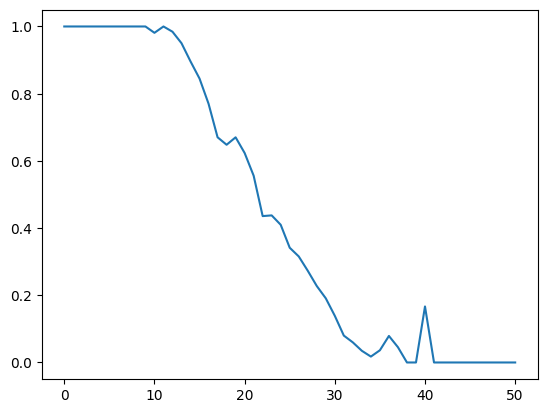

In [68]:
rs_df['points'].plot()

In [ ]:
game_accur_df = df[
    (df['white_username'] == 'Rosolimo')&
    (df['player'] == 'White')
    ].groupby(['player', 'white_username', 'black_username', 'game_id']).agg(
    games = ('game_id', 'nunique'),
    eval = ('evaluation', 'sum'),
    eval_change = ('eval_change', 'sum'),
).reset_index().sort_values('games', ascending=False)
game_accur_df['accur'] = (500 + game_accur_df['eval_change']) / 500
game_accur_df



In [ ]:
work_df.sample(3)

In [ ]:
work_df[
    (work_df['game_id'] == '129502371313') &
    (work_df['color'] == 'White')
].set_index('full_move')[['time_remaining', 'opponent_time_remaining']].plot()

In [ ]:
work_df[
    (work_df['game_id'] == '129502371313') &
    (work_df['color'] == 'White')
].set_index('full_move')[['time_used', 'opponent_time_used']].plot()

In [ ]:

sns.lineplot(
    data=work_df[
        (work_df['game_id'] == '129502371313') 
    ],
    x='full_move', y='evaluation'#, hue='color'
)

In [ ]:
game_accur_df = work_df.groupby(['player', 'color', 'game_id']).agg(
    games = ('game_id', 'nunique'),
    eval = ('evaluation_pawns', 'sum'),
    eval_change = ('eval_change', 'sum'),
    time_per_move = ('time_used', 'mean'),
).reset_index()
game_accur_df['accur'] = (max_eval + game_accur_df['eval_change']) / max_eval
game_accur_df.sample(7)

In [ ]:
phase_df = work_df.groupby(['player', 'color', 'game_phase']).agg(
    games = ('game_id', 'nunique'),
    eval = ('evaluation_pawns', 'sum'),
    eval_change = ('eval_change', 'sum'),
    time = ('time_used', 'sum'),
).reset_index()


In [ ]:
phase_df[phase_df['player'] == 'Rosolimo']

In [ ]:
moves_df = work_df.groupby(['player', 'move_type']).agg(
    games = ('game_id', 'nunique'),
    moves = ('move_number', 'count'),
    eval = ('evaluation_pawns', 'sum'),
    eval_change = ('eval_change', 'sum'),
    time = ('time_used', 'sum'),
).reset_index()
moves_df['eval_per_move'] = moves_df['eval'] / moves_df['moves']
moves_df['eval_change_per_move'] = moves_df['eval_change'] / moves_df['moves']
moves_df['time_per_move'] = moves_df['time'] / moves_df['moves']

In [ ]:
moves_df[moves_df['player'] == 'Rosolimo']

In [ ]:
tst_df = work_df[
    (work_df['game_id'] == '129502371313') &
    (work_df['color'] == 'White')
]
tst_df.sample(7)


In [ ]:
bins = [-np.inf, -4,-3,-2, 0, 1, 2, 3, 4, np.inf]
labels = ['-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4']
work_df['positional_case'] = pd.cut(
    work_df['evaluation_pawns'], 
    bins=bins, 
    labels=labels, 
    right=False, 
    include_lowest=True
    )

In [ ]:
work_df.sample(7)

In [ ]:
situation_df = work_df.groupby(['player', 'color', 'positional_case']).agg(
    games = ('game_id', 'nunique'),
    moves = ('move_number', 'count'),
    points = ('points', 'sum'),
).reset_index()
situation_df['points_per_game'] = situation_df['points'] / situation_df['games']

In [ ]:
situation_df.sample(7)

In [ ]:
situation_df[situation_df['player'] == 'Rosolimo']

In [ ]:
work_df.sample(3)

In [ ]:
tst_df = work_df[
    (work_df['game_id'] == '144769028832')
].drop_duplicates()


In [ ]:
len(tst_df.drop_duplicates())

In [ ]:
len(game_stat)

In [ ]:
game_stat.sample(7)

In [ ]:
game_stat.columns

In [ ]:
player_stat = game_stat.groupby(['player', 'color']).agg(
    games = ('game_id', 'nunique'),
    moves = ('moves_total', 'sum'),
    rating = ('rating', 'mean'),
    opponent_rating = ('opponent_rating', 'mean'),
    rating_difference = ('rating_difference', 'mean'),
    points = ('points', 'sum'),
    eval_avg = ('eval_avg', 'mean'),
    accur = ('accur', 'mean'),
    time_used_total = ('time_used_total', 'sum'),
    blunder_moves = ('blunder_moves', 'sum'),
    mistake_moves = ('mistake_moves', 'sum'),
    normal_moves = ('normal_moves', 'sum'),
    inaccuracy_moves = ('inaccuracy_moves', 'sum'),
    good_moves = ('good_moves', 'sum'),
    eval_minus_4 = ('eval_minus_4', 'sum'),
    eval_minus_3 = ('eval_minus_3', 'sum'),
    eval_minus_2 = ('eval_minus_2', 'sum'),
    eval_minus_1 = ('eval_minus_1', 'sum'),
    eval_plus_1 = ('eval_plus_1', 'sum'),
    eval_plus_2 = ('eval_plus_2', 'sum'),
    eval_plus_3 = ('eval_plus_3', 'sum'),
    eval_plus_4 = ('eval_plus_4', 'sum'),
).reset_index()


player_stat['win_rate'] = player_stat['points'] / player_stat['games']
player_stat['time_per_move'] = player_stat['time_used_total'] / player_stat['moves']
player_stat['blunder_moves'] = player_stat['blunder_moves'] / player_stat['moves']
player_stat['mistake_moves'] = player_stat['mistake_moves'] / player_stat['moves']
player_stat['normal_moves'] = player_stat['normal_moves'] / player_stat['moves']
player_stat['inaccuracy_moves'] = player_stat['inaccuracy_moves'] / player_stat['moves']
player_stat['good_moves'] = player_stat['good_moves'] / player_stat['moves']
player_stat['eval_minus_4'] = player_stat['eval_minus_4'] / player_stat['games']
player_stat['eval_minus_3'] = player_stat['eval_minus_3'] / player_stat['games']
player_stat['eval_minus_2'] = player_stat['eval_minus_2'] / player_stat['games']
player_stat['eval_minus_1'] = player_stat['eval_minus_1'] / player_stat['games']
player_stat['eval_plus_1'] = player_stat['eval_plus_1'] / player_stat['games']
player_stat['eval_plus_2'] = player_stat['eval_plus_2'] / player_stat['games']
player_stat['eval_plus_3'] = player_stat['eval_plus_3'] / player_stat['games']
player_stat['eval_plus_4'] = player_stat['eval_plus_4'] / player_stat['games']




In [ ]:
player_stat[player_stat['player'] == 'Rosolimo'].T

In [ ]:
player_stat[player_stat['games'] > 100]

In [ ]:
player_stat.sample(7)

In [ ]:
rs_df = game_stat[
    (game_stat['player'] == 'Totdusver') &
    (player_stat['eval_plus_2'] == 1)
].groupby('color').agg(
    games = ('game_id', 'nunique'),
    moves = ('moves_total', 'sum'),
    eval_avg = ('eval_avg', 'mean'),
    eval_change_total = ('eval_change_total', 'sum'),
    points = ('points', 'sum'),
    time_used_total = ('time_used_total', 'sum'),
).reset_index()
rs_df['win_rate'] = rs_df['points'] / rs_df['games']
rs_df